# Importación de librerías y carga de datos

In [9]:
"""
# LA ÚLTIMA CELDA GUARDA EL MODELO ENTRENADO !!!!!!!!!

Modulo de entrenamiento para diferentes pipelines de ML para el
entrenamiento utilizando los datasets creados. El flujo es capaz de 
generalizar en la mayoría de los casos y únicamente es necesario
realizar modificaciones en la ruta a los datos.

"""
import os
import pandas as pd 
import seaborn as sns                                                   
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
import pickle


path=r'C:\Users\santi\Desktop\Informatica_medica\Practicas\Final_project_ML\data'

In [10]:
data = pd.read_csv(os.path.join(path,'dataV1_NoAgrupados.csv'),sep=',')

In [11]:
data

,DESCRIPCION,Mes,Tipo Egreso (INTERNACION),Paciente Entidad Responsable Pago,Minutos (Camara - F3),Dx Principal Tipo,Paciente Edad,Paciente Sexo,Clasificacion 1 Triaje \r\nEnfermeria,Modalidad Atencion,...,B200,D509,Q210,H521,E160,S064,M546,T250,F29X,J450
0,1,2.634,0,48,26.633333,1,75.0,1,4,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2.634,1,5,65.133333,0,61.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
2,1,2.634,1,65,82.050000,0,62.0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
3,1,2.634,0,48,0.000000,0,78.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.634,0,1,116.850000,0,73.0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28782,1,1.634,1,53,70.583333,0,23.0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
28783,1,1.634,1,48,42.500000,0,49.0,1,4,1,...,0,0,0,0,0,0,0,0,0,0
28784,1,1.634,1,65,50.133333,0,43.0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
28785,1,1.634,1,18,40.900000,0,54.0,0,3,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print(f'sujetos: {data.shape[0]} | caracteristicas: {data.shape[1]}')

sujetos: 28787 | caracteristicas: 2430


# Preprocesamiento

In [13]:
# Se reorganiza la columna, para ponerla al final

target = data.pop('Tipo Egreso (INTERNACION)')
data.insert(len(data.columns), target.name, target)

### Creación de datasets de entrenamiento y test

In [14]:
X = data.values[:,:-1].astype(float)
y = data.values[:,-1].astype(float)
print(X.shape)
print(y.shape)

(28787, 2429)
(28787,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(                            
    X, # Valores de X
    y, # Valores de Y
    test_size=0.1, # Test de 10% debido a que la validación cruzada se hace con el train set
    random_state=1, # Semilla
    stratify=data.values[:,-1]) # que se mantenga la proporcion en la división

In [16]:
print(f'tamaño del dataset de entrenamiento: {X_train.shape[0]}')
print(f'tamaño del dataset de test: {X_test.shape[0]}')


tamaño del dataset de entrenamiento: 25908
tamaño del dataset de test: 2879


### XGBoosting

In [27]:
# Definir los parámetros para la búsqueda aleatoria
log_reg = LogisticRegression()

param_distributions = {
    'C': uniform(loc=0.001, scale=10.0),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cholesky', 'saga']
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=log_reg,
                                    param_distributions=param_distributions,
                                    n_iter=50,
                                    cv=5,
                                    n_jobs=-1,
                                    verbose=5,
                                    random_state=42,
                                    return_train_score=True,
                                    scoring=['accuracy','precision'],
                                    refit='accuracy')

# Realizar la búsqueda
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y la mejor puntuación
print("Mejores parámetros encontrados por RandomizedSearchCV:")
print(random_search.best_params_)
print("Mejor puntuación encontrada por RandomizedSearchCV:")
print(random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
125 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
55 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\santi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\santi\AppD

Mejores parámetros encontrados por RandomizedSearchCV:
{'C': 0.34488521115218396, 'penalty': 'l2', 'solver': 'newton-cholesky'}
Mejor puntuación encontrada por RandomizedSearchCV:
0.786861518100717


In [28]:
results = pd.DataFrame(random_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_accuracy,split1_test_accuracy,...,mean_test_precision,std_test_precision,rank_test_precision,split0_train_precision,split1_train_precision,split2_train_precision,split3_train_precision,split4_train_precision,mean_train_precision,std_train_precision
0,1.271103,0.029334,0.000000,0.000000,3.746401,l1,newton-cholesky,"{'C': 3.746401188473625, 'penalty': 'l1', 'sol...",NaN,NaN,...,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.258341,0.027995,0.000000,0.000000,7.320939,l1,newton-cholesky,"{'C': 7.320939418114051, 'penalty': 'l1', 'sol...",NaN,NaN,...,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.282551,0.015391,0.000000,0.000000,1.561186,elasticnet,newton-cholesky,"{'C': 1.561186404424365, 'penalty': 'elasticne...",NaN,NaN,...,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,209.697593,5.667419,0.606764,0.199985,0.581836,l1,saga,"{'C': 0.5818361216819946, 'penalty': 'l1', 'so...",0.689116,0.688923,...,0.702058,0.007137,11,0.701077,0.699490,0.706390,0.707726,0.694736,0.701884,0.004731
4,1.320724,0.055131,0.000000,0.000000,1.429668,elasticnet,saga,"{'C': 1.4296681792194077, 'penalty': 'elasticn...",NaN,NaN,...,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,131.844965,3.857626,0.146737,0.066591,0.565116,l2,saga,"{'C': 0.5651157902710026, 'penalty': 'l2', 'so...",0.689309,0.689116,...,0.702128,0.007154,9,0.700895,0.699519,0.706482,0.708082,0.694813,0.701958,0.004819
6,0.877030,0.121090,0.000000,0.000000,0.008788,l1,newton-cholesky,"{'C': 0.008787658410143284, 'penalty': 'l1', '...",NaN,NaN,...,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,461.291320,30.222141,1.199118,0.746256,3.043422,l2,newton-cholesky,"{'C': 3.043422429595377, 'penalty': 'l2', 'sol...",0.785604,0.779622,...,0.767921,0.001793,3,0.801622,0.802920,0.803417,0.799735,0.801478,0.801834,0.001285
8,1.356342,1.143019,0.000000,0.000000,4.320450,l1,newton-cholesky,"{'C': 4.320450186421158, 'penalty': 'l1', 'sol...",NaN,NaN,...,NaN,NaN,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,144.660572,4.956892,0.536311,0.343471,6.119529,l2,saga,"{'C': 6.119528947223795, 'penalty': 'l2', 'sol...",0.689116,0.688923,...,0.701855,0.006857,23,0.700943,0.699528,0.706297,0.707400,0.694659,0.701765,0.004658


In [29]:
results[results['rank_test_accuracy']==1].T

,19
mean_fit_time,438.059725
std_fit_time,35.934704
mean_score_time,0.814426
std_score_time,0.857616
param_C,0.344885
param_penalty,l2
param_solver,newton-cholesky
params,"{'C': 0.34488521115218396, 'penalty': 'l2', 's..."
split0_test_accuracy,0.789271
split1_test_accuracy,0.781552


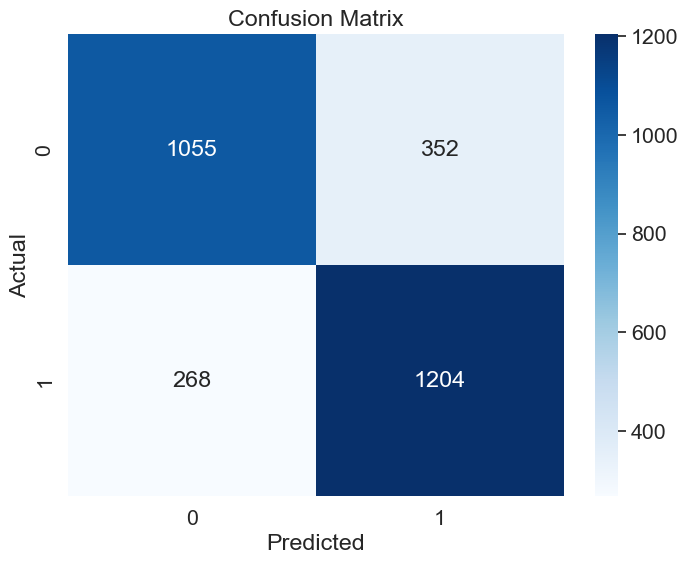

In [30]:
y_pred = random_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # Ajustar el tamaño de la fuente
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
# Nombre del directorio y del archivo
nombre_dir = 'models'
model_name = 'LR_RSearchCV.pkl'

# Crear el directorio si no existe
if not os.path.exists(nombre_dir):
    os.makedirs(nombre_dir)

# Crear la ruta completa del archivo
path = os.path.join(nombre_dir, model_name)

# Guardar el DataFrame en formato CSV
pickle.dump(random_search.best_estimator_, open(path, 'wb'))